In [1]:
from tensorflow.keras.datasets import mnist
import numpy as np

(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

train_images_with_noise_channels = np.concatenate(
    [train_images, np.random.random((len(train_images), 784))], axis=1)

train_images_with_zeros_channels = np.concatenate(
    [train_images, np.zeros((len(train_images), 784))], axis=1)


In [3]:
train_images.shape

(60000, 784)

In [4]:
from tensorflow import keras
from tensorflow.keras import layers

def get_model():
    model = keras.Sequential([
        layers.Dense(512, activation="relu"),
        layers.Dense(10, activation="softmax")
    ])
    model.compile(optimizer="rmsprop",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model

model = get_model()
history_noise = model.fit(
    train_images_with_noise_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

model = get_model()
history_zeros = model.fit(
    train_images_with_zeros_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)


Epoch 1/10
375/375 [==============================] - 4s 6ms/step - loss: 0.6202 - accuracy: 0.8113 - val_loss: 0.2746 - val_accuracy: 0.9161
Epoch 2/10
375/375 [==============================] - 2s 6ms/step - loss: 0.2500 - accuracy: 0.9225 - val_loss: 0.1862 - val_accuracy: 0.9446
Epoch 3/10
375/375 [==============================] - 2s 6ms/step - loss: 0.1626 - accuracy: 0.9496 - val_loss: 0.1475 - val_accuracy: 0.9563
Epoch 4/10
375/375 [==============================] - 2s 6ms/step - loss: 0.1140 - accuracy: 0.9646 - val_loss: 0.1411 - val_accuracy: 0.9590
Epoch 5/10
375/375 [==============================] - 2s 6ms/step - loss: 0.0847 - accuracy: 0.9731 - val_loss: 0.1347 - val_accuracy: 0.9604
Epoch 6/10
375/375 [==============================] - 2s 6ms/step - loss: 0.0610 - accuracy: 0.9801 - val_loss: 0.1189 - val_accuracy: 0.9670
Epoch 7/10
375/375 [==============================] - 3s 7ms/step - loss: 0.0468 - accuracy: 0.9846 - val_loss: 0.1198 - val_accuracy: 0.9680
Epoch 

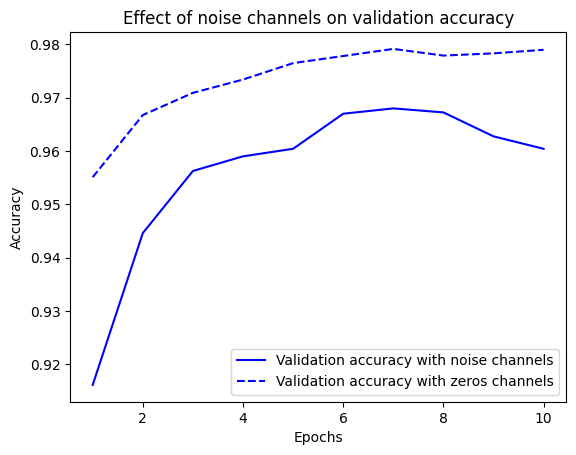

In [5]:
import matplotlib.pyplot as plt
val_acc_noise = history_noise.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]
epochs = range(1, 11)
plt.plot(epochs, val_acc_noise, "b-",
         label="Validation accuracy with noise channels")
plt.plot(epochs, val_acc_zeros, "b--",
         label="Validation accuracy with zeros channels")
plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()
